### Project Title: Loan Approval Prediction
##### Goal: Predict whether a loan application will be approved based on applicant information using multiple ML models.
##### Tools: Python, Pandas, Scikit-learn, Matplotlib & Seaborn
##### Models Used: Logistic Regression, Decision Tree, Random Forest
##### Outcome: Achieved best accuracy with Naive Bayes (84%).

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_excel('loan.xlsx')

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']

### Checking for any Missed Values in the dataset

In [46]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [47]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


### Filling the Missed values in the datatset using Fillna() fucntion

In [49]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


### Checking the distribution of total income by using Logirthmic values

In [7]:
df['TotalIncome_Log'] = np.log(df['TotalIncome'])

<Axes: >

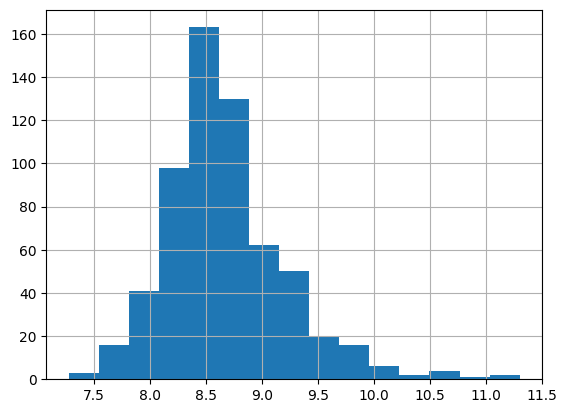

In [12]:
df['TotalIncome_Log'].hist(bins=15)

### Checking the loan Amount distribution using Histogram

<Axes: >

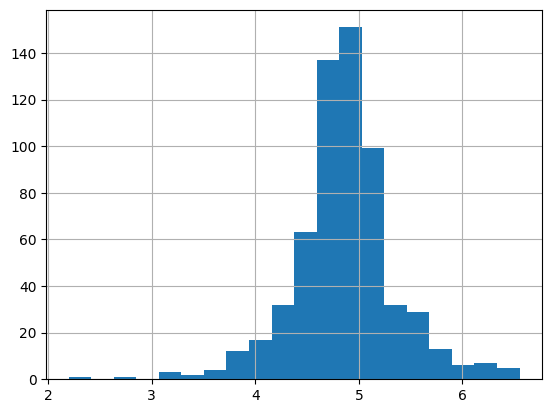

In [52]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)

### Finding which column have high impact on loans

Number of people who have taken loan based on Gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

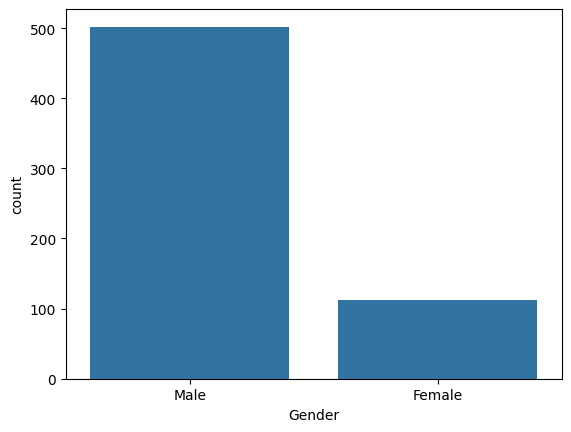

In [76]:
print('Number of people who have taken loan based on Gender: ')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data = df)

The number of people who have taken loan based on Marital status: 
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

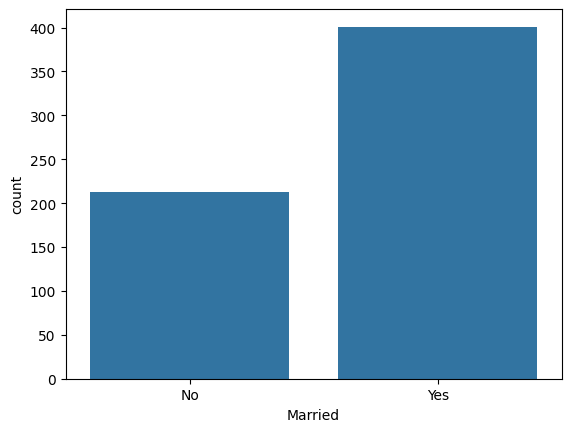

In [77]:
print('The number of people who have taken loan based on Marital status: ')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df)

The number of people who have taken loan based on the dependents : 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

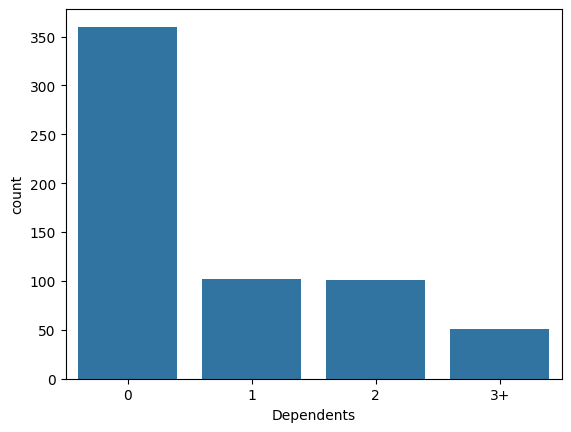

In [78]:
print('The number of people who have taken loan based on the dependents : ')
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data = df)

The number of people who have loan status based on the education :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

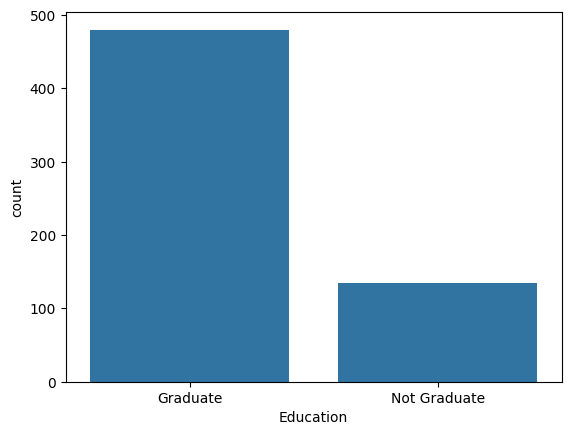

In [79]:
df.head()
print('The number of people who have loan status based on the education :')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
 14  LoanAmount_log     614 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 72.1+ KB


### Converting the alphabetical values into numberical values 

In [82]:
le = LabelEncoder()

In [83]:
df['Gender'] = le.fit_transform(df['Gender'])

In [87]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [97]:
pd.set_option('future.no_silent_downcasting',True)
df['Dependents'] = df['Dependents'].replace('3+',3).astype('int64')

In [99]:
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = le.fit_transform(df['Dependents'])

#### Taking Feature and Target Variables

In [106]:
x = df.iloc[:,np.r_[1:6, 8:12, 13:15]]
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
0,1,0,0,0,0,146.412162,360.0,1.0,2,5849.0,4.986426
1,1,1,1,0,0,128.000000,360.0,1.0,0,6091.0,4.852030
2,1,1,0,0,1,66.000000,360.0,1.0,2,3000.0,4.189655
3,1,1,0,1,0,120.000000,360.0,1.0,2,4941.0,4.787492
4,1,0,0,0,0,141.000000,360.0,1.0,2,6000.0,4.948760
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360.0,1.0,0,2900.0,4.262680
610,1,1,3,0,0,40.000000,180.0,1.0,0,4106.0,3.688879
611,1,1,1,0,0,253.000000,360.0,1.0,2,8312.0,5.533389
612,1,1,2,0,0,187.000000,360.0,1.0,2,7583.0,5.231109


In [107]:
y = df.iloc[:,12]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Initiating the Train Test Split

In [108]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#### Scaling the numberical Values using Standard Scaler

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()

In [150]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### I'm going to check withe Multiple model
##### 1) RandomForestClassifier
##### 2) Decision Tree Classifier
##### 3) Naive Bayes
##### 4) KNeigbors
##### 5) Logistic Regression

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

##### Importing classification report to check the scores

In [123]:
from sklearn.metrics import classification_report

In [151]:
model_random_forest = RandomForestClassifier()
model_random_forest.fit(x_train_scaled,y_train)
y_model_random_forest_predict = model_random_forest.predict(x_test_scaled)
clas_report_random_forest = classification_report(y_model_random_forest_predict,y_test)
print('The Classification report of RandomForestClassifier:')
print(clas_report_random_forest)

The Classification report of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        40
           1       0.79      0.86      0.82        83

    accuracy                           0.75       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.74      0.75      0.74       123



In [152]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(x_train_scaled,y_train)
y_model_decision_tree_predict = model_decision_tree.predict(x_test_scaled)
clas_report_decision_tree = classification_report(y_model_decision_tree_predict,y_test)
print('The Classification report of DecisionTreeClassifier:')
print(clas_report_decision_tree)


The Classification report of DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.73      0.41      0.52        59
           1       0.61      0.86      0.71        64

    accuracy                           0.64       123
   macro avg       0.67      0.63      0.62       123
weighted avg       0.67      0.64      0.62       123



In [153]:
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(x_train_scaled,y_train)
y_model_naive_bayes_predict = model_naive_bayes.predict(x_test_scaled)
clas_report_decision_tree = classification_report(y_model_naive_bayes_predict, y_test)
print('The Classification report of Naive Bayes :')
print(clas_report_decision_tree)

The Classification report of Naive Bayes :
              precision    recall  f1-score   support

           0       0.45      0.88      0.60        17
           1       0.98      0.83      0.90       106

    accuracy                           0.84       123
   macro avg       0.72      0.86      0.75       123
weighted avg       0.91      0.84      0.86       123



In [154]:
model_kneighbors = KNeighborsClassifier()
model_kneighbors.fit(x_train_scaled,y_train)
y_model_kneighbors_predict = model_kneighbors.predict(x_test_scaled)
clas_report_kneighbors = classification_report(y_model_kneighbors_predict, y_test)
print('The Classification report of KNeighbors Classifiers : ')
print(clas_report_kneighbors)

The Classification report of KNeighbors Classifiers : 
              precision    recall  f1-score   support

           0       0.45      0.71      0.56        21
           1       0.93      0.82      0.88       102

    accuracy                           0.80       123
   macro avg       0.69      0.77      0.72       123
weighted avg       0.85      0.80      0.82       123



In [157]:
model_logistic = LogisticRegression(max_iter = 10000)
model_logistic.fit(x_train,y_train)
y_model_logistic_predict = model_logistic.predict(x_test)
clas_report_logistic = classification_report(y_model_logistic_predict, y_test)
print('The Classification report of Logistic Regression :')
print(clas_report_logistic)

The Classification report of Logistic Regression :
              precision    recall  f1-score   support

           0       0.42      0.88      0.57        16
           1       0.98      0.82      0.89       107

    accuracy                           0.83       123
   macro avg       0.70      0.85      0.73       123
weighted avg       0.91      0.83      0.85       123



#### Final Model Justification: Naive Bayes
##### Best Performance: Achieved the highest accuracy (84%) among all models tested.

##### Speed: Extremely fast to train and predict, even on larger datasets.

##### Simplicity: Easy to implement and interpret.

##### Robustness: Performs well even with relatively strong feature independence assumptions.